- The null hypothesis for ANOVA is that all group's means are the same. (There is no statistical difference between groups.)

- The alternate hypothesis is that there is a difference in group's means. (There is a statistical difference between groups.)

Note There are more advanced versions of ANOVA, but for this lesson we will be covering a One-Way ANOVA, meaning that we have 1 variable/feature with more than 2 groups that we want to compare.

# Question: Do different diets result in different amounts of weight loss?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1DW-2yHUm0YhH01r_kNp9ir5CaAlo9s48dhpIx-6J-TM/gviz/tq?tqx=out:csv&sheet=Diets'
df = pd.read_csv(url)
df.head()

,gender,Age,Height,pre.weight,Diet,weight6weeks,kg_lost
0,0,22,159,58,1,54.2,3.8
1,0,46,192,60,1,54.0,6.0
2,0,55,170,64,1,63.3,0.7
3,0,33,171,64,1,61.1,2.9
4,0,50,170,65,1,62.2,2.8


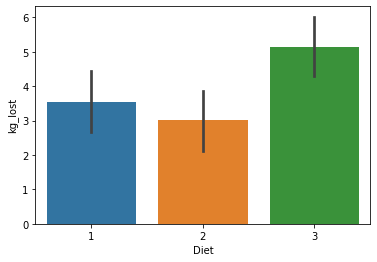

In [3]:
sns.barplot(data=df, x='Diet',y='kg_lost');

# Hypothesis

- Null Hypothesis:  Different diets all have the same results. (the kg_lost is not significantly different between diets)

- Alternative Hypothesis: Different diets have different results. (the kg_lost is significantly different between diets)

- Using an alpha=.05

Note that our hypothesis do NOT specify which groups are different, just that there is or isn't a difference when taking all three into consideration.

In [4]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['Diet'].unique():
    ## Get series for group and rename
    data = df.loc[df['Diet']==i,'kg_lost'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys([1, 2, 3])

In [5]:
#Testing Assumptions
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
1,26.0,0.216027,3.064706
2,27.0,0.841993,0.343967
3,27.0,0.463144,1.539436


In [6]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
1,26.0,0.216027,3.064706,False
2,27.0,0.841993,0.343967,False
3,27.0,0.463144,1.539436,False


In [7]:
#Testing Assumption of Equal Variance
# not using * operator, entering each group manually
stats.levene(groups[1],
            groups[2],
            groups[3])

LeveneResult(statistic=0.30650755802082735, pvalue=0.7369067613743494)

In [8]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=0.30650755802082735, pvalue=0.7369067613743494)

In [9]:
#One-Way ANOVA Test
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=5.679765022955312, pvalue=0.005001924377430895)

Oohh..a significant result! But...WHICH diets were different??

- An ANOVA returns a single p-value to represent the differences between ALL groups. Now that we KNOW we have significant differences, we are allowed to perform pairwise comparisons between every group.
 - We will not use an ordinary t-test for this, instead, we will use a test that is specifically designed to adjust each pair's p-values so that we are less likely to make a Type I error.

In [10]:
#Tukey's Pairwise Multiple Comparison test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['kg_lost']
labels = df['Diet']

In [11]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.5125,0.7204,-2.0964,1.0713,False
1,3,1.6097,0.0455,0.0259,3.1935,True
2,3,2.1222,0.0051,0.5534,3.691,True


- You can see in the summary above that there are 2 significant results.  We see that there is a significant difference in weight loss between diet 1 and 3 and between diet 2 and 3.  There is no difference between 1 and 2.

- Note, that this example only includes 3 groups to compare, but this summary would be much longer as the number of groups to compare increases since every pairwise combination is tested!

- In conclusion, our test showed that there is a significant difference in the results of diet 3 compared to the other two diets.  The amount of kilograms lost was significantly higher for those who were on diet 3.